In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sales.csv")
df.head()

,Product,Quantity,UnitPrice,Region
0,Laptop,2,800,North
1,Chair,5,50,South
2,Phone,3,500,East
3,Tablet,4,300,West
4,Headphones,6,80,North


In [5]:
df["TotalRevenue"] = df["Quantity"] * df["UnitPrice"]
df.head()

,Product,Quantity,UnitPrice,Region,TotalRevenue
0,Laptop,2,800,North,1600
1,Chair,5,50,South,250
2,Phone,3,500,East,1500
3,Tablet,4,300,West,1200
4,Headphones,6,80,North,480


In [6]:
product_sales = df.groupby("Product")["TotalRevenue"].sum().reset_index()
top_products = product_sales.sort_values(by="TotalRevenue", ascending=False)
top_products.head(3)

,Product,TotalRevenue
3,Laptop,16000
6,Phone,15000
9,Tablet,12000


In [7]:
df["Date"] = pd.date_range(start="2025-01-01", periods=len(df))
df = df.sort_values("Date")
df["CumulativeSales"] = df["TotalRevenue"].cumsum()
df.head()

,Product,Quantity,UnitPrice,Region,TotalRevenue,Date,CumulativeSales
0,Laptop,2,800,North,1600,2025-01-01,1600
1,Chair,5,50,South,250,2025-01-02,1850
2,Phone,3,500,East,1500,2025-01-03,3350
3,Tablet,4,300,West,1200,2025-01-04,4550
4,Headphones,6,80,North,480,2025-01-05,5030


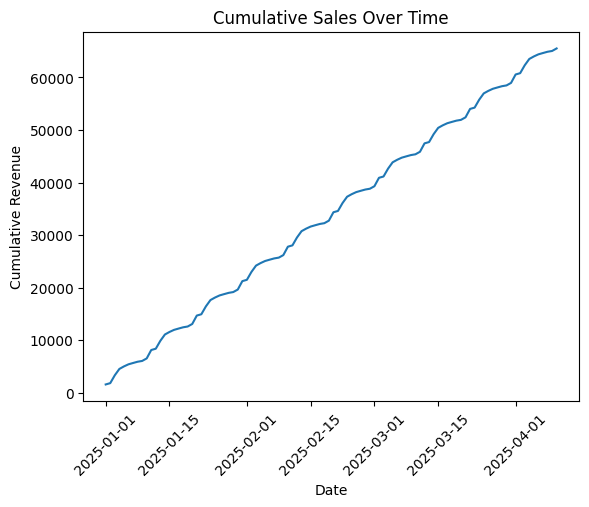

In [8]:
plt.figure()
plt.plot(df["Date"], df["CumulativeSales"])
plt.title("Cumulative Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Revenue")
plt.xticks(rotation=45)
plt.show()

In [9]:
product_name = input("Enter product name: ")

filtered = df[df["Product"].str.lower() == product_name.lower()]

if len(filtered) > 0:
    total = filtered["TotalRevenue"].sum()
    print(f"Total Revenue for {product_name}: {total}")
else:
    print("Product not found.")

Enter product name: laptop
Total Revenue for laptop: 16000
